In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
# pip install pymongo

In [60]:
from pymongo import MongoClient

# Replace with your connection string
uri = "mongodb://localhost:27017/"

# Connect to MongoDB
client = MongoClient(uri)

# List databases
print(client.list_database_names())

['admin', 'backpack_prices', 'config', 'house_prices', 'local', 'sticker_sales']


In [61]:
# Select your database
db = client["backpack_prices"]
print(db.list_collection_names())

['train_data', 'extra_train_data', 'test_data']


In [62]:
# Select collection
collection = db["train_data"]

In [63]:
collection2 = db["extra_train_data"]

In [64]:
import pandas as pd

# Convert collection to DataFrame
data = list(collection.find())
df = pd.DataFrame(data)

# Drop MongoDB's default `_id` field
df.drop(columns=["_id"], inplace=True)

In [65]:
import pandas as pd

# Convert collection to DataFrame
data = list(collection2.find())
extra_df = pd.DataFrame(data)

# Drop MongoDB's default `_id` field
extra_df.drop(columns=["_id"], inplace=True)

In [66]:
df = pd.concat([df, extra_df], ignore_index=True)
df.shape

(3994318, 11)

In [67]:
df.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [68]:
df.rename(columns={'Brand':'brand', 'Material':'material', 'Size':'size', 'Compartments':'compartments', 'Laptop Compartment':'laptop_compartment', 'Waterproof':'waterproof', 'Style':'style', 'Color':'color', 'Weight Capacity (kg)':'weight_capacity_kgs', 'Price':'price'}, inplace=True)

In [69]:
df.columns

Index(['id', 'brand', 'material', 'size', 'compartments', 'laptop_compartment',
       'waterproof', 'style', 'color', 'weight_capacity_kgs', 'price'],
      dtype='object')

In [70]:
df.describe()

,id,compartments,weight_capacity_kgs,price
count,3.994318e+06,3.994318e+06,3.992510e+06,3.994318e+06
mean,2.182137e+06,5.434740e+00,1.801042e+01,8.136217e+01
std,1.178058e+06,2.893043e+00,6.973969e+00,3.893868e+01
min,0.000000e+00,1.000000e+00,5.000000e+00,1.500000e+01
25%,1.198579e+06,3.000000e+00,1.206896e+01,4.747002e+01
50%,2.197158e+06,5.000000e+00,1.805436e+01,8.098495e+01
75%,3.195738e+06,8.000000e+00,2.398751e+01,1.148550e+02
max,4.194317e+06,1.000000e+01,3.000000e+01,1.500000e+02


In [71]:
df.isnull().sum()

id                          0
brand                  126758
material               110962
size                    87785
compartments                0
laptop_compartment      98533
waterproof              94324
style                  104180
color                  133617
weight_capacity_kgs      1808
price                       0
dtype: int64

In [72]:
df.dtypes

id                       int64
brand                   object
material                object
size                    object
compartments           float64
laptop_compartment      object
waterproof              object
style                   object
color                   object
weight_capacity_kgs    float64
price                  float64
dtype: object

In [73]:
# df['brand']=df['brand'].astype('string')
# df['material']=df['material'].astype('string')
# df['size']=df['size'].astype('string')
# df['laptop_compartment']=df['laptop_compartment'].astype('string')
# df['waterproof']=df['waterproof'].astype('string')
# df['style']=df['style'].astype('string')
# df['color']=df['color'].astype('string')

In [74]:
# df['id'] = df['id'].astype(str)
# df['id']=pd.to_numeric(df['id'], errors='coerce')

In [75]:
# df['compartments'] = df['compartments'].astype(str)
# df['weight_capacity_kgs'] = df['weight_capacity_kgs'].astype(str)
# df['price'] = df['price'].astype(str)

In [76]:
# df['compartments']=pd.to_numeric(df['compartments'], errors='coerce')
# df['weight_capacity_kgs']=pd.to_numeric(df['weight_capacity_kgs'], errors='coerce')
# df['price']=pd.to_numeric(df['price'], errors='coerce')

In [77]:
import numpy as np
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
for feature in features_with_na:
    print(f"{feature}: {np.round(df[feature].isnull().mean() * 100, 4)}% missing values")

brand: 3.1735% missing values
material: 2.778% missing values
size: 2.1977% missing values
laptop_compartment: 2.4668% missing values
waterproof: 2.3615% missing values
style: 2.6082% missing values
color: 3.3452% missing values
weight_capacity_kgs: 0.0453% missing values


In [107]:
df.describe()

,id,compartments,weight_capacity_kgs,price
count,3.994318e+06,3.994318e+06,3.992510e+06,3.994318e+06
mean,2.182137e+06,5.434740e+00,1.801042e+01,8.136217e+01
std,1.178058e+06,2.893043e+00,6.973969e+00,3.893868e+01
min,0.000000e+00,1.000000e+00,5.000000e+00,1.500000e+01
25%,1.198579e+06,3.000000e+00,1.206896e+01,4.747002e+01
50%,2.197158e+06,5.000000e+00,1.805436e+01,8.098495e+01
75%,3.195738e+06,8.000000e+00,2.398751e+01,1.148550e+02
max,4.194317e+06,1.000000e+01,3.000000e+01,1.500000e+02


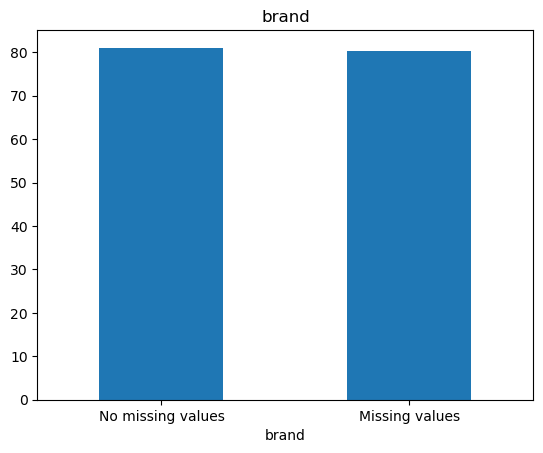

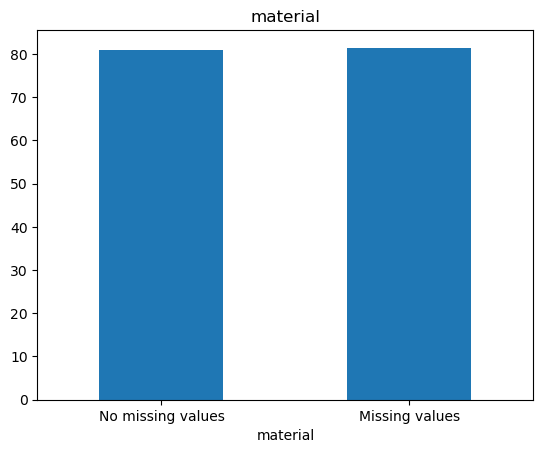

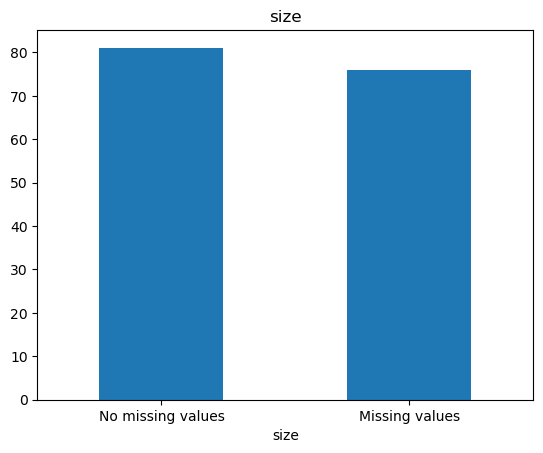

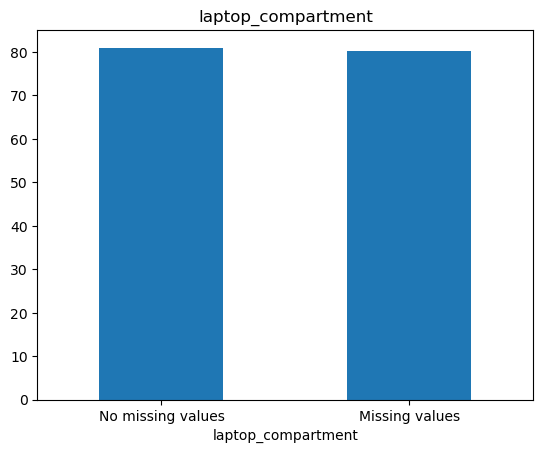

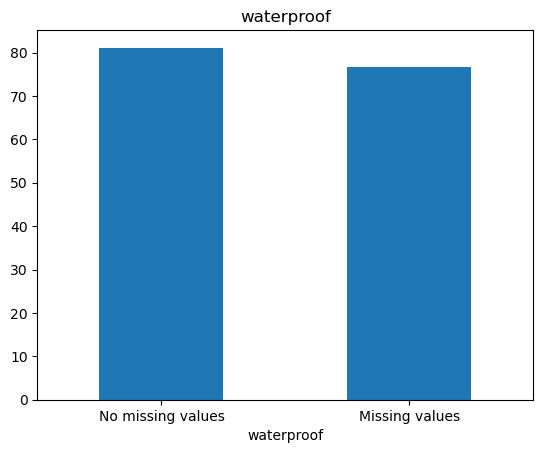

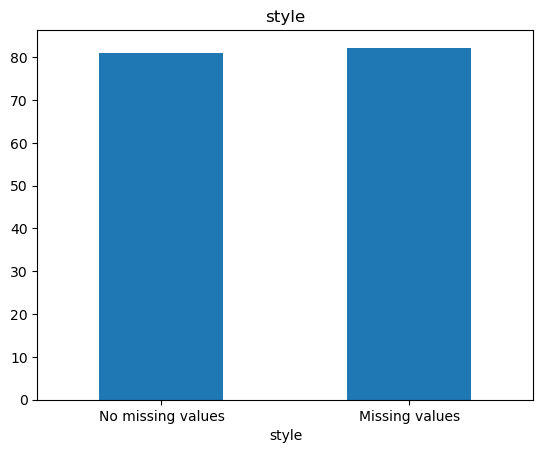

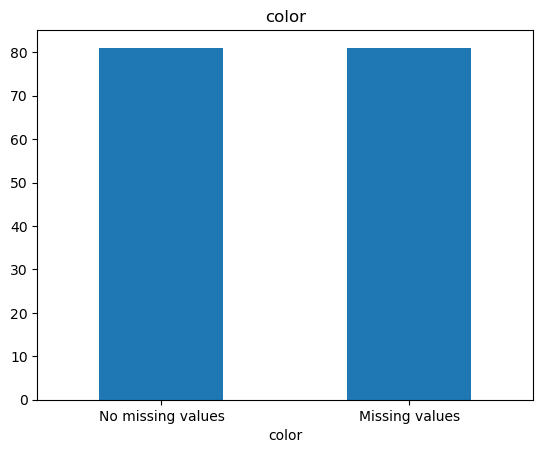

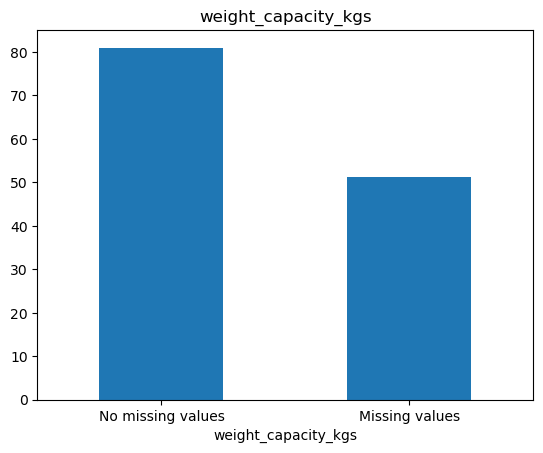

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns

for feature in features_with_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.xticks(ticks=[0, 1], labels=['No missing values', 'Missing values'], rotation=0)
    plt.show()

In [79]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
cat_features

['brand',
 'material',
 'size',
 'laptop_compartment',
 'waterproof',
 'style',
 'color']

In [80]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(f"Number of numerical features: {len(numerical_features)}")
df[numerical_features].head()

Number of numerical features: 4


,id,compartments,weight_capacity_kgs,price
0,0,7.0,11.611723,112.15875
1,1,10.0,27.078537,68.88056
2,2,2.0,16.643760,39.17320
3,3,8.0,12.937220,80.60793
4,4,1.0,17.749338,86.02312


In [81]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and not feature == 'id']
print(f"Number of discrete features: {len(discrete_feature)}")

Number of discrete features: 1


In [82]:
discrete_feature

['compartments']

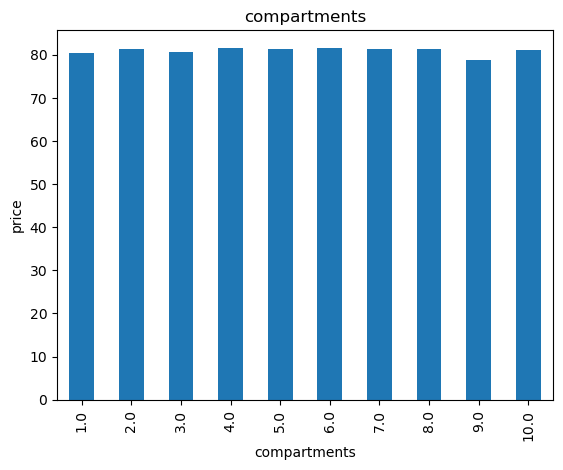

In [83]:
for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [84]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature and not feature == 'id']
print(f"Number of continuous features: {len(continuous_feature)}")

Number of continuous features: 2


In [85]:
continuous_feature

['weight_capacity_kgs', 'price']

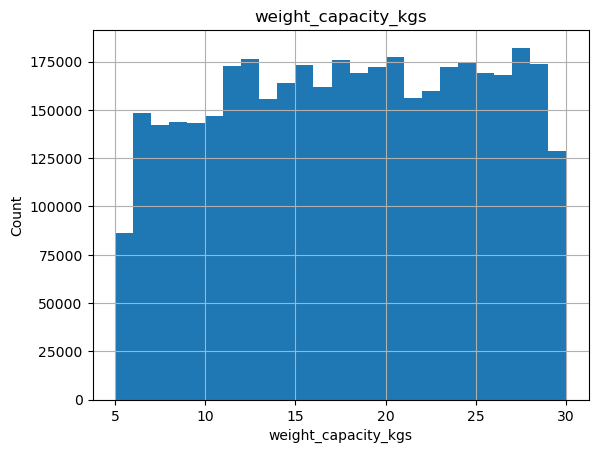

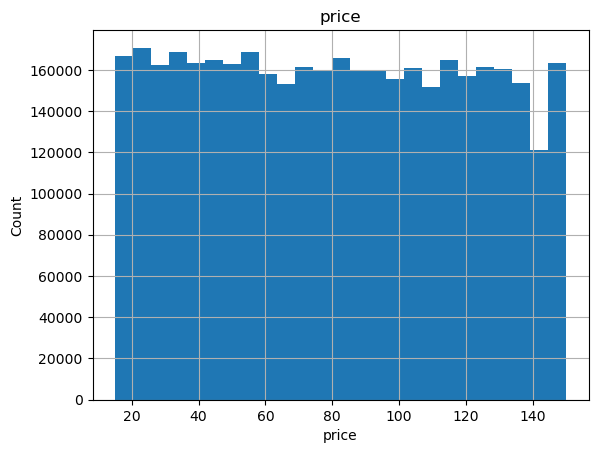

In [86]:
for feature in continuous_feature:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

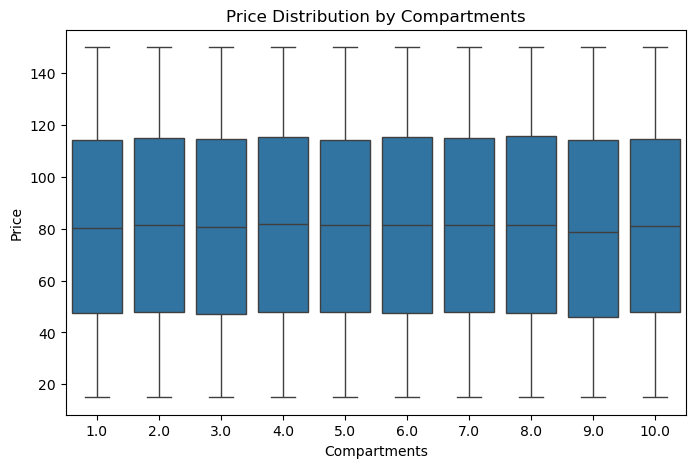

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['compartments'], y=df['price'])
plt.xlabel('Compartments')
plt.ylabel('Price')
plt.title('Price Distribution by Compartments')
plt.show()

In [88]:
df['weight_capacity_kgs'].corr(df['price'])

0.017703018728162503

In [89]:
print(df['laptop_compartment'].value_counts())
print(df['waterproof'].value_counts())

laptop_compartment
Yes    1972937
No     1922848
Name: count, dtype: int64
waterproof
Yes    1969205
No     1930789
Name: count, dtype: int64


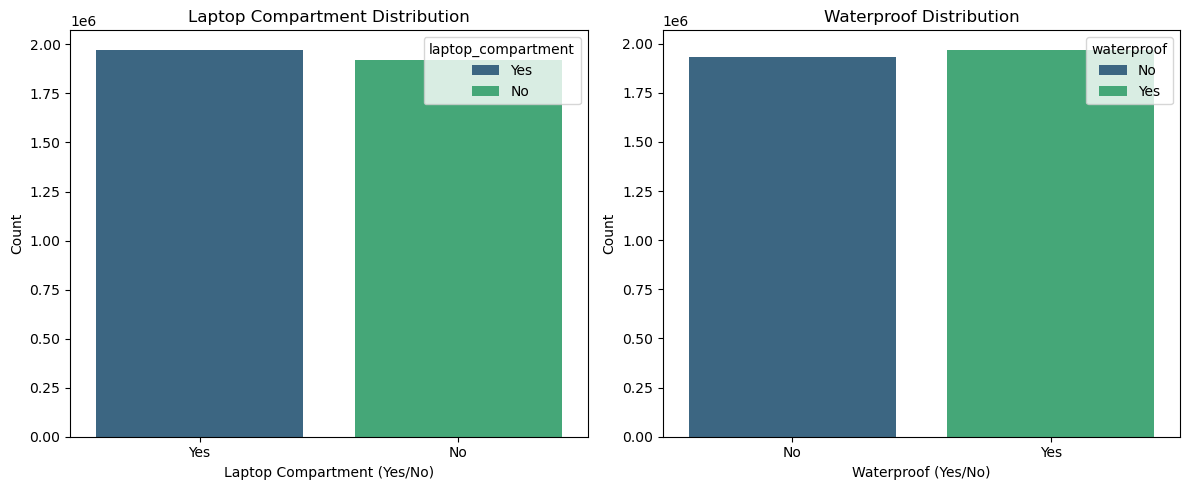

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Laptop Compartment Distribution
sns.countplot(x=df['laptop_compartment'], ax=axes[0], hue = df['laptop_compartment'],palette="viridis")
axes[0].set_title('Laptop Compartment Distribution')
axes[0].set_xlabel('Laptop Compartment (Yes/No)')
axes[0].set_ylabel('Count')

# Waterproof Distribution
sns.countplot(x=df['waterproof'], ax=axes[1], hue=df['waterproof'],palette="viridis")
axes[1].set_title('Waterproof Distribution')
axes[1].set_xlabel('Waterproof (Yes/No)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


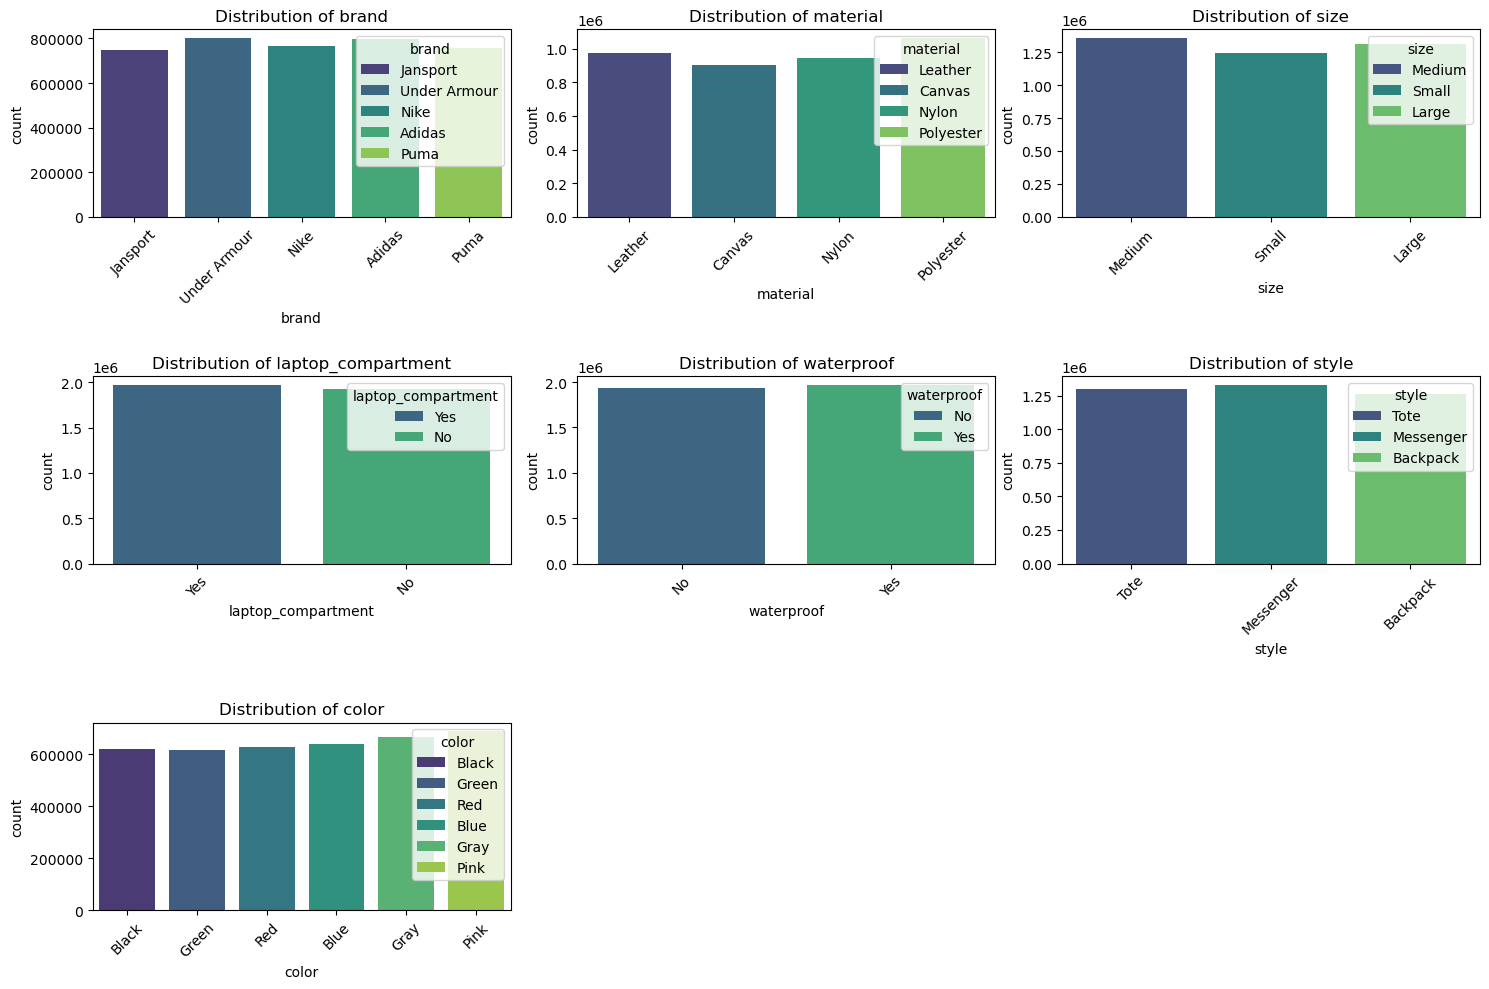

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], data=df, hue=df[col],palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


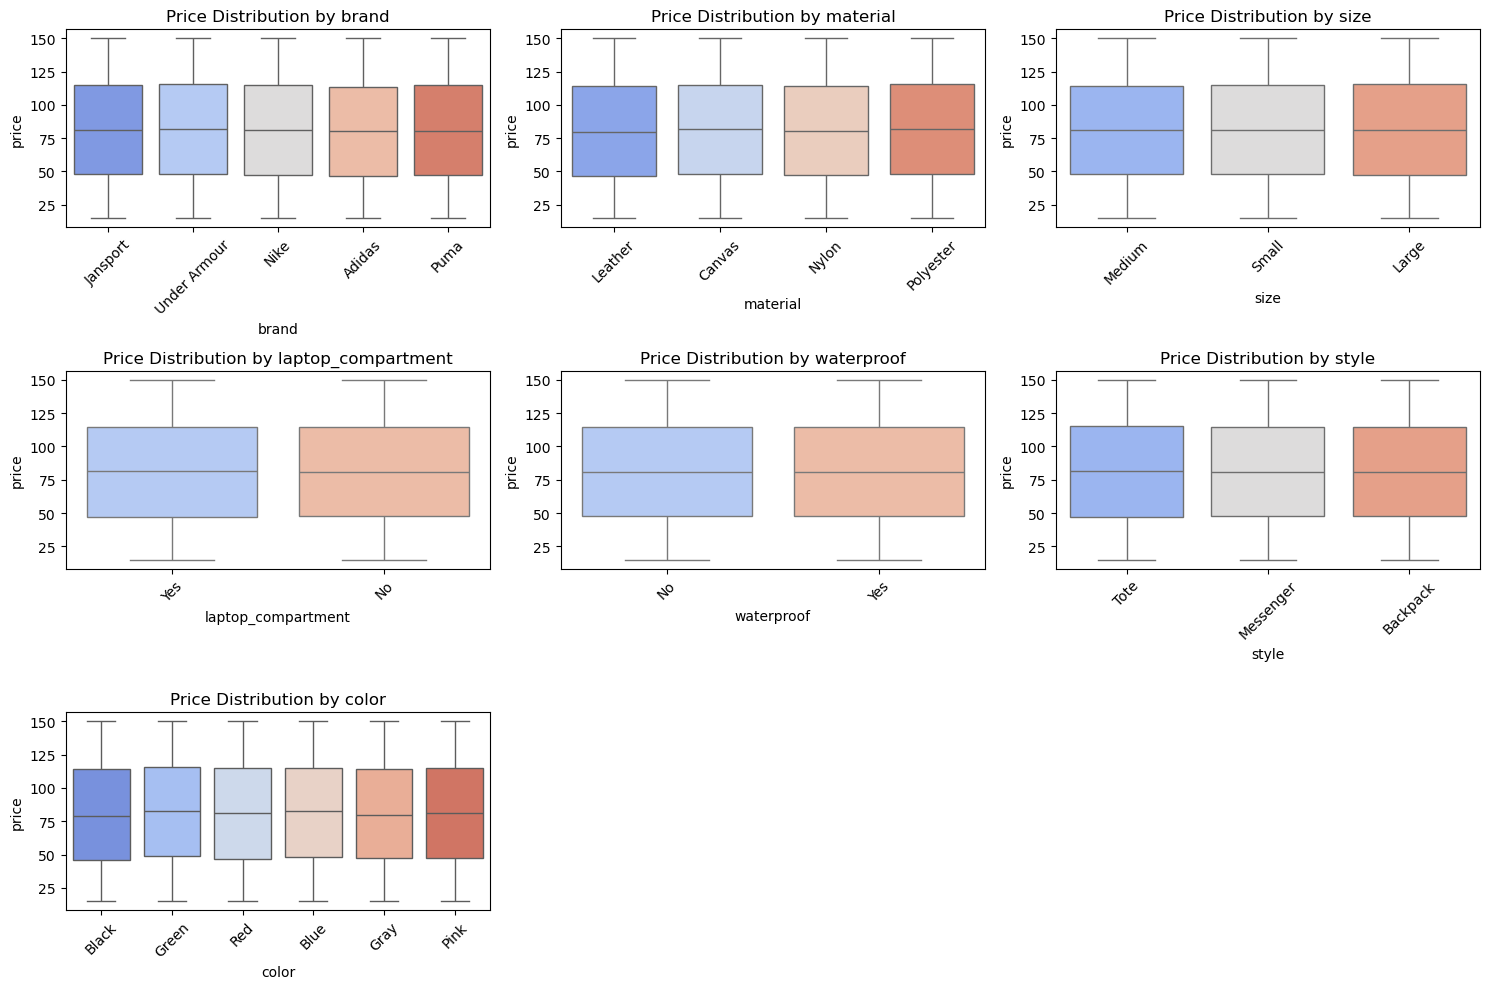

In [92]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], y=df['price'], data=df, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title(f"Price Distribution by {col}")

plt.tight_layout()
plt.show()


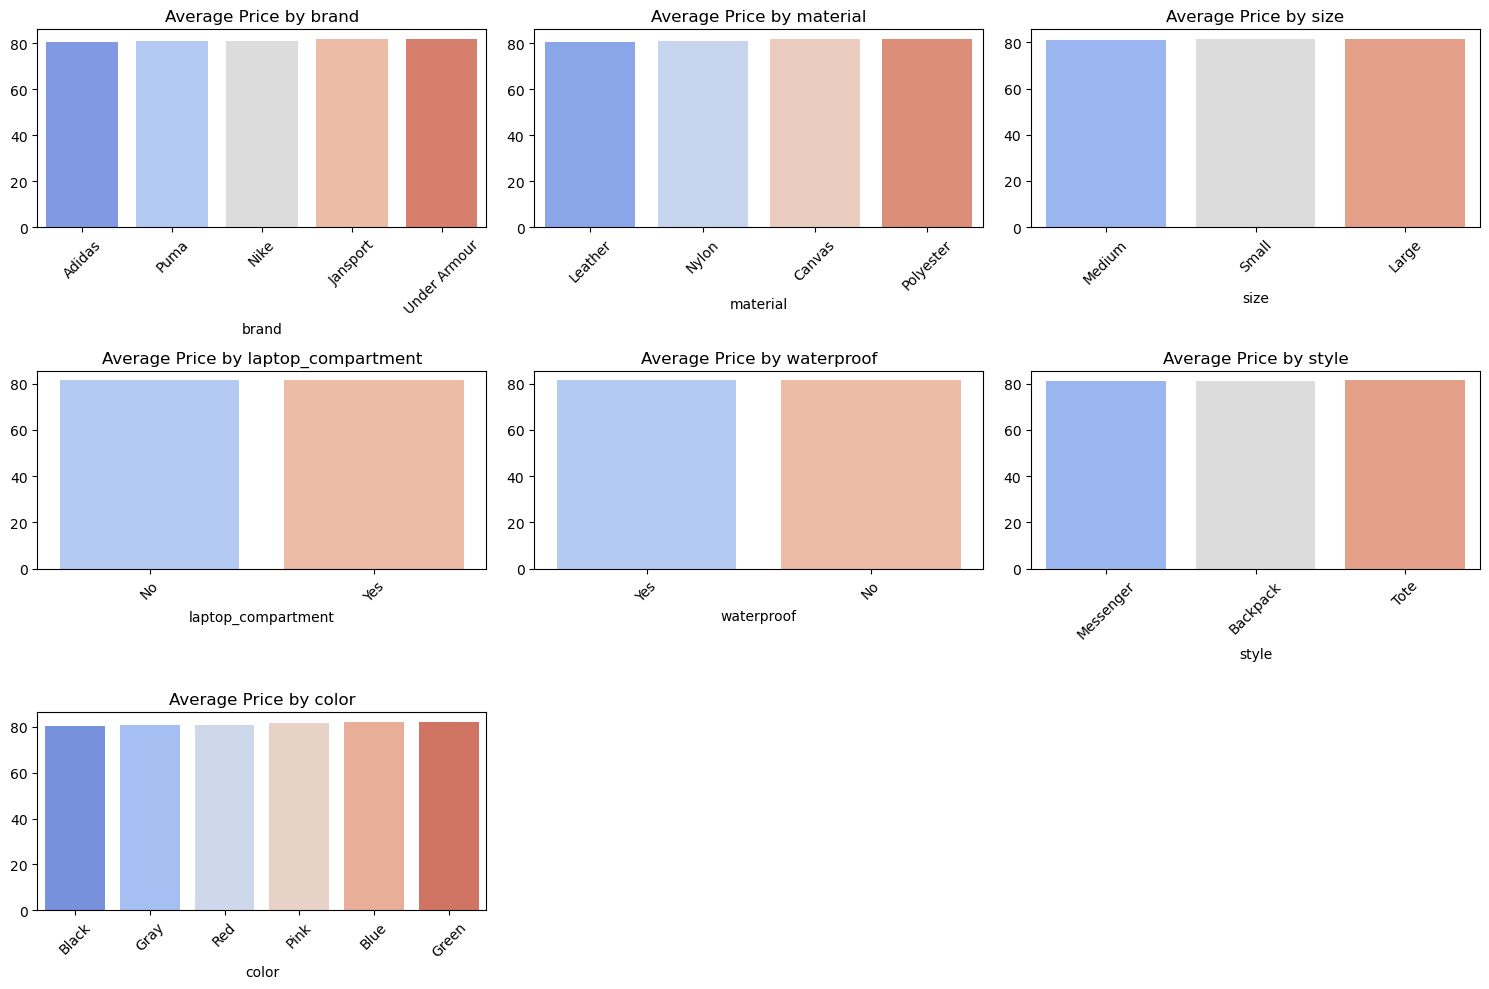

In [93]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    avg_price = df.groupby(col)['price'].mean().sort_values()
    sns.barplot(x=avg_price.index, y=avg_price.values, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title(f"Average Price by {col}")

plt.tight_layout()
plt.show()


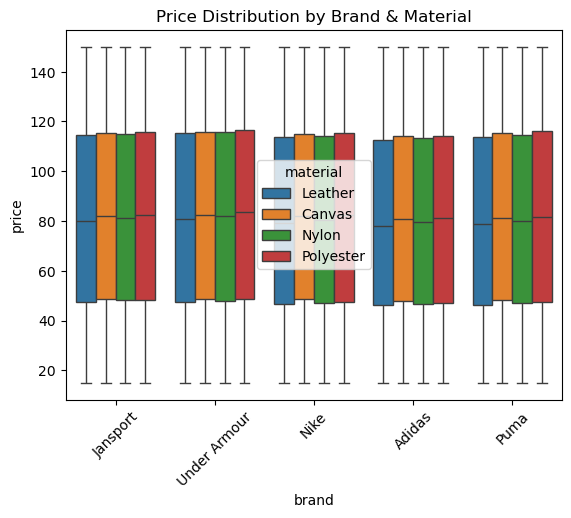

In [94]:
sns.boxplot(x=df['brand'], y=df['price'], hue=df['material'])
plt.xticks(rotation=45)
plt.title("Price Distribution by Brand & Material")
plt.show()

In [95]:
df_mode_imp = df.copy()
for feature in cat_features:
    df_mode_imp[feature] = df_mode_imp[feature].fillna(df_mode_imp[feature].mode()[0])


In [96]:
for feature in cat_features:
    print(f"{feature} has {len(df_mode_imp[feature].unique())} unique values")

brand has 5 unique values
material has 4 unique values
size has 3 unique values
laptop_compartment has 2 unique values
waterproof has 2 unique values
style has 3 unique values
color has 6 unique values


In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in cat_features:
    if feature != 'size':
        df_mode_imp[feature] = le.fit_transform(df_mode_imp[feature].astype(str))

In [98]:
from sklearn.preprocessing import OrdinalEncoder
size_order = ['Small', 'Medium', 'Large']
oe = OrdinalEncoder(categories=[size_order])
df_mode_imp[['size']] = oe.fit_transform(df_mode_imp[['size']])

<Axes: xlabel='weight_capacity_kgs', ylabel='Count'>

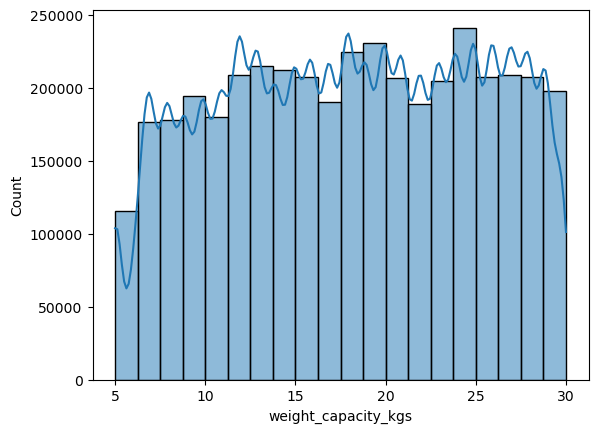

In [99]:
import seaborn as sns
sns.histplot(df['weight_capacity_kgs'], bins=20, kde=True)

In [100]:
df_imputed = df_mode_imp.copy()
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_imputed['weight_capacity_kgs'] = imputer.fit_transform(df_mode_imp[['weight_capacity_kgs']])

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_imputed['weight_capacity_kgs'] = scaler.fit_transform(df_imputed[['weight_capacity_kgs']])

AttributeError: Line2D.set() got an unexpected keyword argument 'bins'

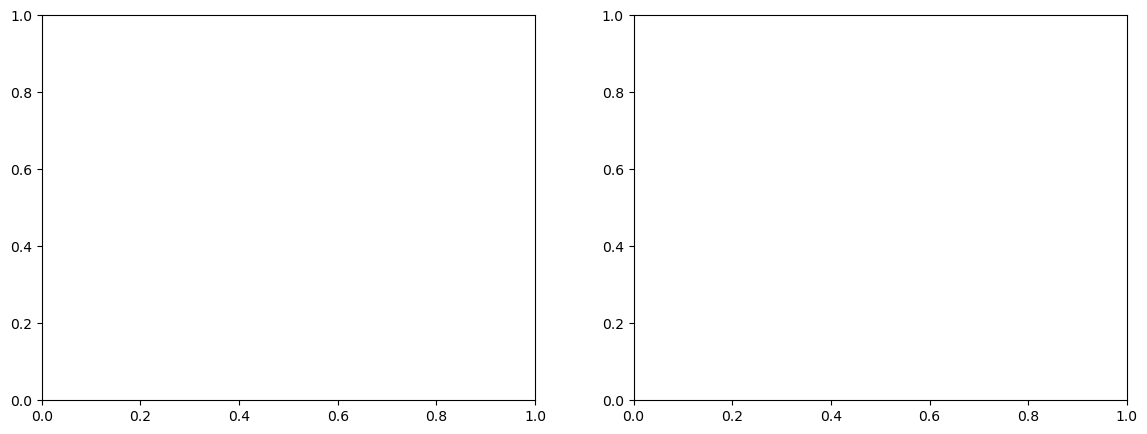

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Two side-by-side subplots

# Plot Before Imputation
sns.histplot(df_mode_imp['weight_capacity_kgs'], bins=30, color='red', kde=True, ax=axes[0])
axes[0].set_title("Before KNN Imputation", fontsize=14)
axes[0].set_xlabel("Weight Capacity (Kgs)")
axes[0].set_ylabel("Count")

# Plot After Imputation
sns.histplot(df_imputed['weight_capacity_kgs'], bins=30, color='blue', kde=True, ax=axes[1])
axes[1].set_title("After KNN Imputation", fontsize=14)
axes[1].set_xlabel("Weight Capacity (Kgs)")
axes[1].set_ylabel("Count")

# Adjust Layout
plt.tight_layout()
plt.show()


In [103]:
df_imputed.head()

,id,brand,material,size,compartments,laptop_compartment,waterproof,style,color,weight_capacity_kgs,price
0,0,1,1,1.0,7.0,1,0,2,0,-0.917719,112.15875
1,1,1,0,0.0,10.0,1,1,1,3,1.300576,68.88056
2,2,4,1,0.0,2.0,1,0,1,5,-0.196010,39.17320
3,3,2,2,0.0,8.0,1,0,1,3,-0.727612,80.60793
4,4,0,0,1.0,1.0,1,1,1,3,-0.037445,86.02312


In [104]:
df_imputed['weight_capacity_kgs'].describe()

count    3.994318e+06
mean     4.901892e-16
std      1.000000e+00
min     -1.865991e+00
25%     -8.516603e-01
50%      5.880550e-03
75%      8.569656e-01
max      1.719580e+00
Name: weight_capacity_kgs, dtype: float64

In [120]:
df['weight_capacity_kgs'].describe()

count    3.992510e+06
mean     1.801042e+01
std      6.973969e+00
min      5.000000e+00
25%      1.206896e+01
50%      1.805436e+01
75%      2.398751e+01
max      3.000000e+01
Name: weight_capacity_kgs, dtype: float64

<Axes: xlabel='weight_capacity_kgs', ylabel='Count'>

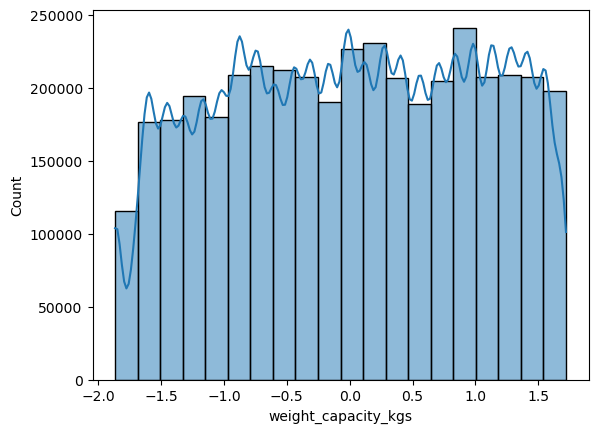

In [105]:
sns.histplot(df_imputed['weight_capacity_kgs'], bins=20, kde=True)

In [121]:
df_imputed['compartment_density'] = df_imputed['compartments'] / (df_imputed['weight_capacity_kgs'] + 1e-6)

In [ ]:
import seaborn as sns
sns.histplot(df_imputed['compartment_density'], kde=True)

KeyboardInterrupt: 